In [197]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [198]:
dataset = pd.read_csv('insurance.csv')

In [199]:
dataset.shape

(1338, 7)

In [200]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [201]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [202]:
dataset.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [203]:
dataset.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [204]:
dataset.replace({'sex':{'male':0,'female':1},'smoker':{'no':0, 'yes':1},'region':{'southeast':0,'southwest':1,
                                                                                  'northwest':2,'northeast':3}},inplace=True)

In [205]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [206]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [207]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [208]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


/Users/anthonyhuang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


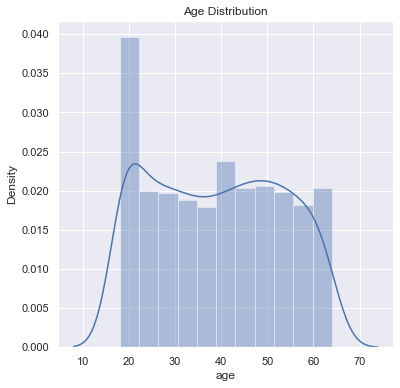

In [209]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

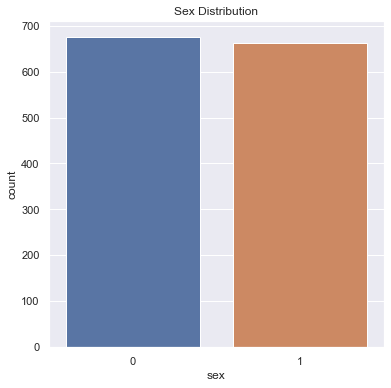

In [210]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=dataset)
plt.title('Sex Distribution')
plt.show()

/Users/anthonyhuang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


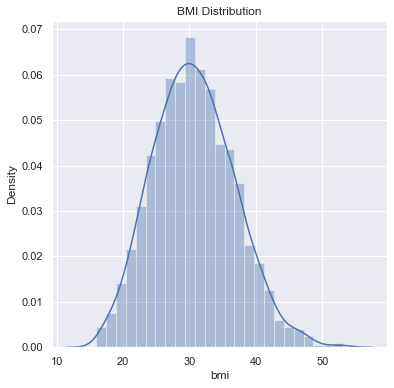

In [211]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

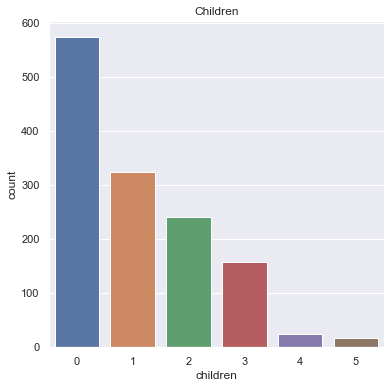

In [212]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dataset)
plt.title('Children')
plt.show()

Train and Test split data

In [213]:
X = dataset.drop('charges',axis =1)
Y = dataset['charges']

In [214]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.1, random_state =1)

Make a Model 

In [215]:
model =LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [216]:
prediction = model.predict(X_test)
error_score = metrics.r2_score(Y_test,prediction)
print("Error Score R square : ", error_score)

Error Score R square :  0.7268659644207318


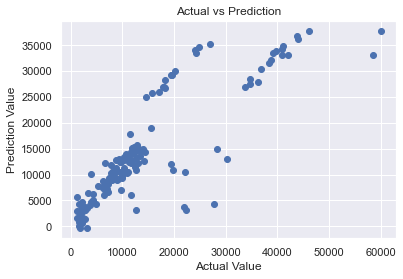

In [217]:
Y_test = list(Y_test)
prediction = list(prediction)
plt.scatter(Y_test,prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("Actual vs Prediction")
plt.show()

In [218]:
input_data = (31,1,25.74,0,1,0)
input_numpy = np.asarray(input_data)
input_reshape = input_numpy.reshape(1,-1)
prediction_result = model.predict(input_reshape)
print("Estimation : ",prediction_result[0])


Estimation :  27515.576774651738


/Users/anthonyhuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
